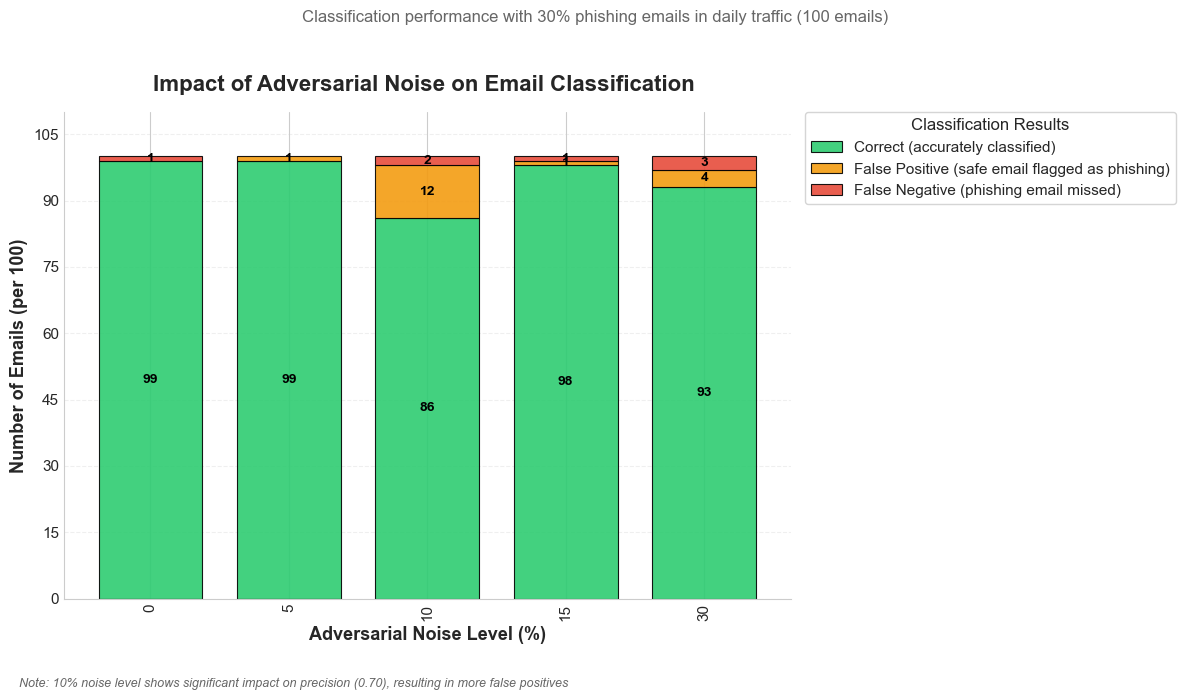

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Use the data you provided
noise_levels = [0, 5, 10, 15, 30]
# Assume 100 emails per day, 30 of which are phishing
total_emails = 100
phishing_emails = 30
legit_emails = total_emails - phishing_emails

# Use your metrics
metrics = {
    0: {"precision": 0.98, "recall": 0.98},
    5: {"precision": 0.95, "recall": 1.00},
    10: {"precision": 0.70, "recall": 0.95},
    15: {"precision": 0.96, "recall": 0.99},
    30: {"precision": 0.87, "recall": 0.92},
}

# Create chart data
chart_data = []

for level in noise_levels:
    p = metrics[level]["precision"]
    r = metrics[level]["recall"]

    TP = int(r * phishing_emails)
    FN = phishing_emails - TP
    FP = int((1 - p) * TP / p) if p > 0 else 0
    TN = legit_emails - FP
    correct = TP + TN
    chart_data.append([level, correct, FP, FN])

df = pd.DataFrame(
    chart_data, columns=["Noise Level", "Correct", "False Positive", "False Negative"]
)
df.set_index("Noise Level", inplace=True)

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# Create figure with higher resolution
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)

# Better color palette with higher contrast - using the original colors
colors = ["#2ecc71", "#f39c12", "#e74c3c"]

# Plot with enhanced styling
df.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor="black",
    linewidth=0.8,
    width=0.75,
    alpha=0.9,
)

# Improved titles and labels
ax.set_title(
    "Impact of Adversarial Noise on Email Classification ",
    fontsize=16, 
    weight="bold",
    pad=15
)
ax.set_xlabel("Adversarial Noise Level (%)", fontsize=13, weight='bold')
ax.set_ylabel("Number of Emails (per 100)", fontsize=13, weight='bold')

# Add subtitle
ax.text(
    x=0.5, 
    y=0.97, 
    s="Classification performance with 30% phishing emails in daily traffic (100 emails)",
    transform=fig.transFigure,
    ha='center',
    fontsize=12,
    alpha=0.7
)

# Enhanced legend with better formatting
legend = ax.legend(
    [
        "Correct (accurately classified)",
        "False Positive (safe email flagged as phishing)",
        "False Negative (phishing email missed)",
    ],
    title="Classification Results",
    title_fontsize=12,
    fontsize=11,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    frameon=True,
    framealpha=0.95,
    edgecolor='lightgray'
)
legend.get_frame().set_linewidth(1)

# Add data values on bars
for i, bar in enumerate(ax.containers):
    ax.bar_label(
        bar,
        labels=[f"{h:.0f}" if h > 0 else "" for h in bar.datavalues],
        label_type='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# Add precision and recall values as annotations below x-axis labels
for i, level in enumerate(noise_levels):
    precision = metrics[level]["precision"]
    recall = metrics[level]["recall"]
    ax.annotate(
        f"P: {precision:.2f}, R: {recall:.2f}",
        xy=(i, -6),  # Position below the x-axis
        xytext=(0, 0),
        textcoords="offset points",
        ha='center',
        va='top',
        fontsize=9,
        fontweight='bold',
    )
    
# Style improvements
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0, 110)
ax.set_axisbelow(True)
ax.tick_params(axis='both', labelsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Add a subtle grid only on the y-axis
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add annotations
plt.figtext(
    0.02, 0.02, 
    "Note: 10% noise level shows significant impact on precision (0.70), resulting in more false positives",
    style='italic', fontsize=9, alpha=0.7
)

# Increase bottom margin to make room for P/R values
plt.tight_layout(rect=[0, 0.06, 1, 0.97])

# Show plot
plt.show()


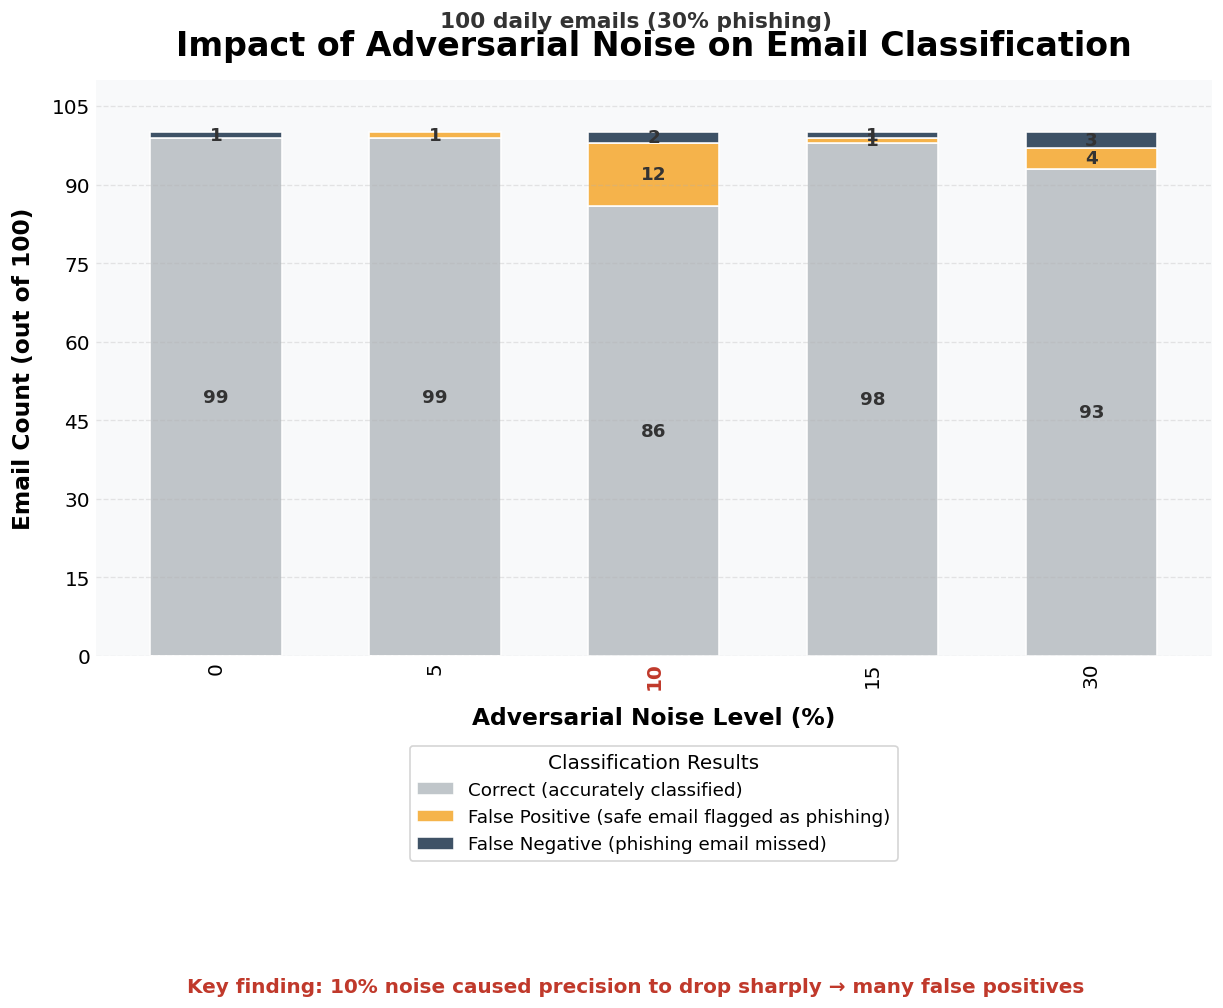

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

# Data setup
noise_levels = [0, 5, 10, 15, 30]
phishing_emails = 30
legit_emails = 70

metrics = {
    0: {"precision": 0.98, "recall": 0.98},
    5: {"precision": 0.95, "recall": 1.00},
    10: {"precision": 0.70, "recall": 0.95},
    15: {"precision": 0.96, "recall": 0.99},
    30: {"precision": 0.87, "recall": 0.92},
}

# Calculate chart data
chart_data = []
for level in noise_levels:
    p = metrics[level]["precision"]
    r = metrics[level]["recall"]
    TP = int(r * phishing_emails)
    FN = phishing_emails - TP
    FP = int((1 - p) * TP / p) if p > 0 else 0
    TN = legit_emails - FP
    correct = TP + TN
    chart_data.append([level, correct, FP, FN])

df = pd.DataFrame(chart_data, columns=["Noise Level", "Correct", "False Positive", "False Negative"])
df.set_index("Noise Level", inplace=True)

# Plot setup
plt.style.use('default')
plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(figsize=(12, 8), dpi=120)

# Colors to match slides
colors = ["#BDC3C7", "#F5B041", "#34495E"]  # Gray, Orange, Navy

# Bar plot
df.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor="white",
    linewidth=1,
    width=0.6,
    alpha=0.95
)

# Titles and labels
ax.set_title("Impact of Adversarial Noise on Email Classification", fontsize=20, weight="bold", pad=15)
plt.figtext(0.5, 0.935, "100 daily emails (30% phishing)", ha='center', fontsize=13, fontweight='bold', color='#333')
ax.set_xlabel("Adversarial Noise Level (%)", fontsize=14, weight='bold', labelpad=10)
ax.set_ylabel("Email Count (out of 100)", fontsize=14, weight='bold', labelpad=10)

# Detailed legend below plot
legend = ax.legend(
    [
        "Correct (accurately classified)",
        "False Positive (safe email flagged as phishing)",
        "False Negative (phishing email missed)"
    ],
    title="Classification Results",
    title_fontsize=12,
    fontsize=11,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.14),
    ncol=1,
    frameon=True,
    framealpha=0.95,
    edgecolor='lightgray'
)
legend.get_frame().set_linewidth(1)

# Label bars
for bar in ax.containers:
    ax.bar_label(
        bar,
        labels=[f"{int(val)}" if val > 0 else "" for val in bar.datavalues],
        label_type='center',
        fontsize=11,
        fontweight='bold',
        color='#333'
    )

# Emphasize 10% noise bar
ax.get_xticklabels()[2].set_color('#C0392B')
ax.get_xticklabels()[2].set_weight('bold')

# Formatting
ax.set_ylim(0, 110)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.tick_params(axis='both', labelsize=12, length=0)
for spine in ax.spines.values():
    spine.set_visible(False)

# Key takeaway annotation (fixed spacing!)
plt.figtext(
    0.5, -0.07,
    "Key finding: 10% noise caused precision to drop sharply → many false positives",
    ha='center',
    fontsize=12,
    fontweight='bold',
    color='#C0392B'
)

# Clean background
fig.patch.set_facecolor('white')
ax.set_facecolor('#F8F9FA')

# Adjust layout to prevent overlap
plt.subplots_adjust(bottom=0.28, top=0.88)
plt.show()
